In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('census-income.csv')

# DATA PREPROCESSING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14                   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.shape

(32561, 15)

In [5]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' '],
      dtype='object')

In [6]:
df['age']=df['age'].astype('object')

In [7]:
df.rename(columns={' ':'Salary'}, inplace=True)

In [8]:
df.drop(df.columns[-2],axis=1,inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


In [9]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
Salary             0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [11]:
import seaborn as sns
df.corr()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
fnlwgt,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,-0.018768,0.148123,0.078409,0.054256,1.000000


In [12]:
df.duplicated().sum()

25

In [13]:
df=df[~df.duplicated()]

In [14]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


# DATA VISUALIZATION

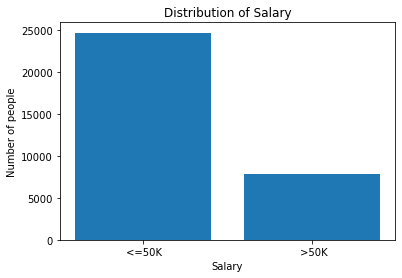

In [16]:
Salary=df['Salary'].value_counts()
plt.bar(Salary.index,Salary,)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


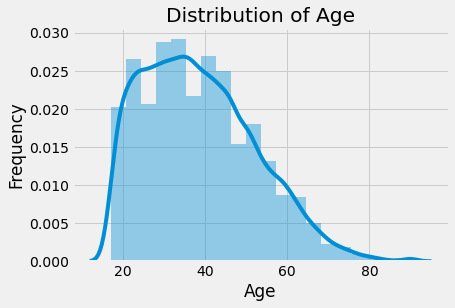

In [18]:
plt.style.use('fivethirtyeight')
sns.distplot(df['age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

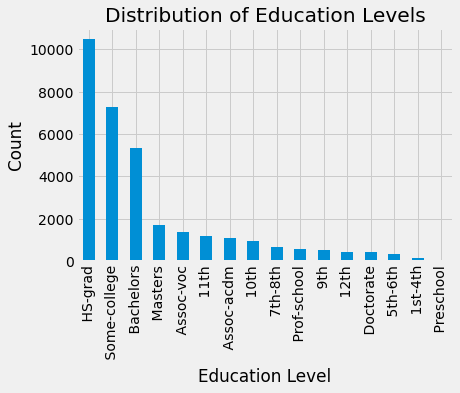

In [19]:
df[' education'].value_counts().plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()

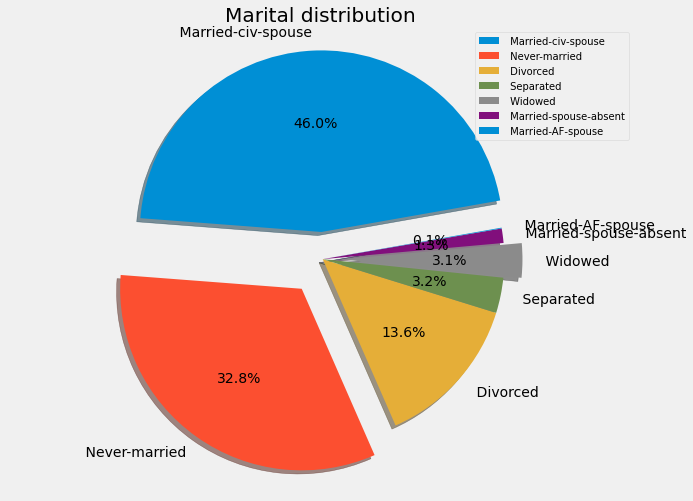

In [20]:
plt.figure(figsize=(10,8))
marital=df[' marital-status'].value_counts()
plt.pie(marital.values, labels=marital.index,startangle=10, explode=(
    0.15, 0.20, 0, 0, 0.10, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 10})
plt.axis('equal')
plt.show()

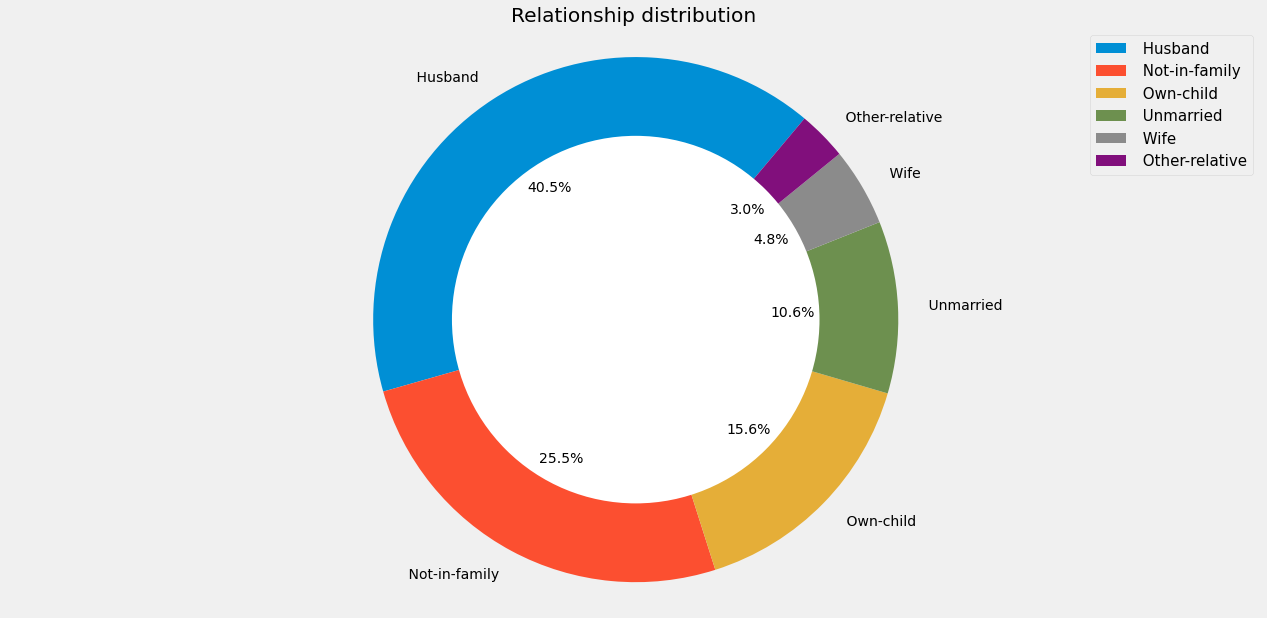

In [21]:
relation = df[' relationship'].value_counts()
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution')
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


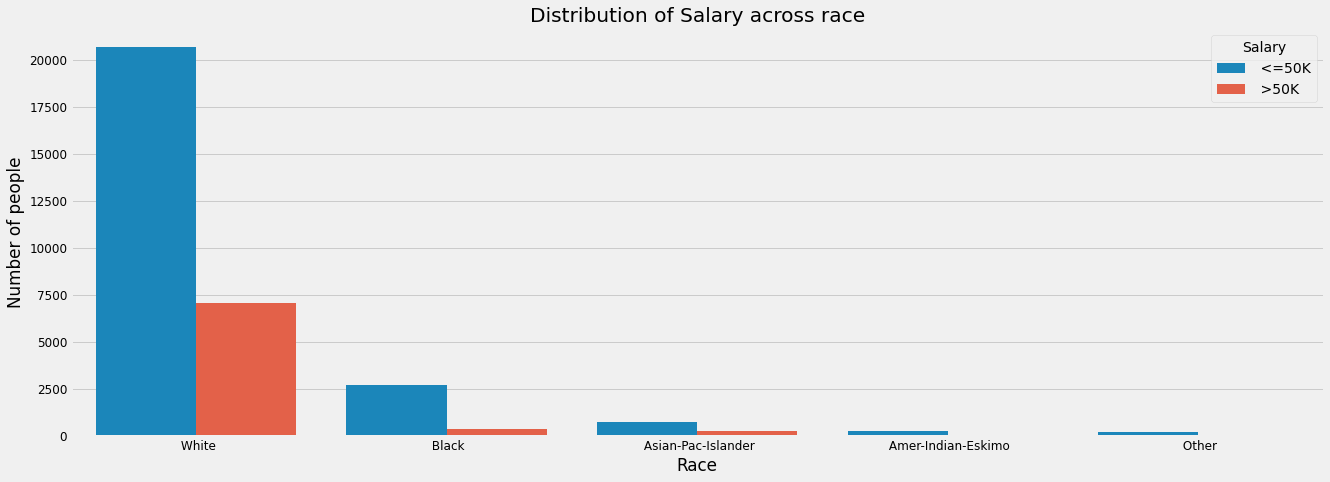

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(df[' race'], hue=df['Salary'])
plt.title('Distribution of Salary across race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()

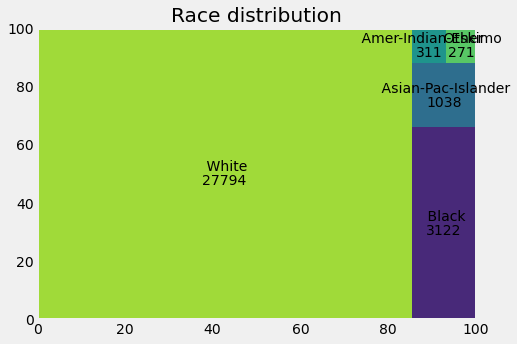

In [23]:
import squarify
race = df[' race'].value_counts()

plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


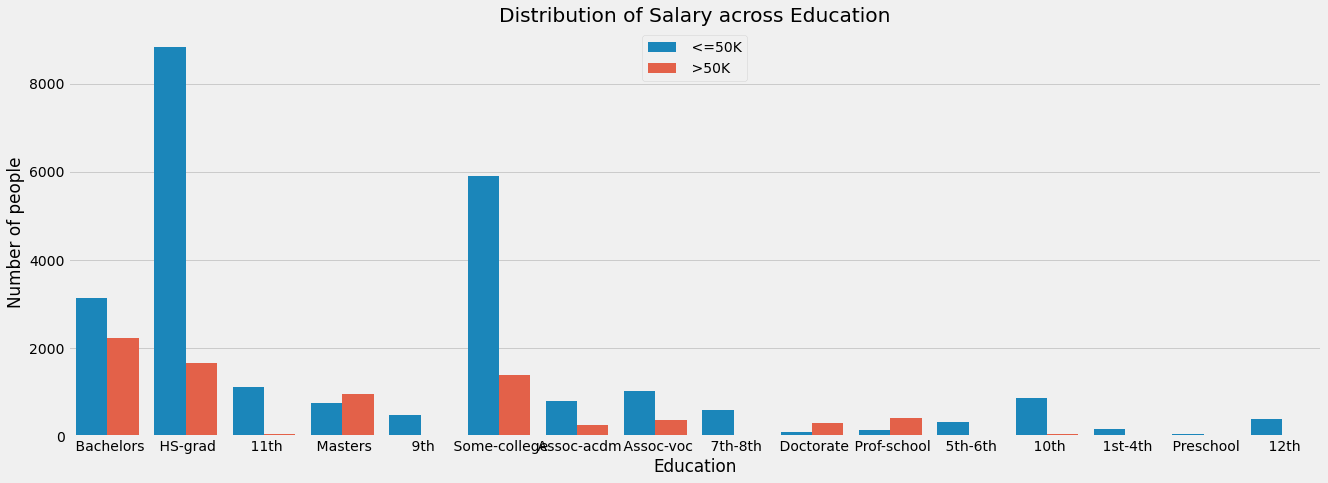

In [24]:
# Creating a countplot of salary across race
plt.figure(figsize=(20, 7))
sns.countplot(df[' education'],
              hue=df['Salary'])
plt.title('Distribution of Salary across Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


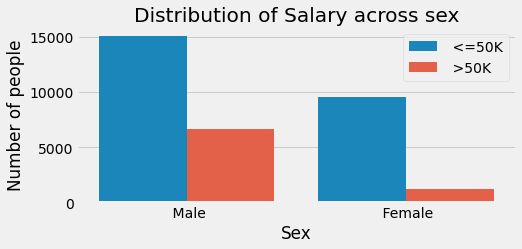

In [25]:
# Creating a countplot of salary across sex
plt.figure(figsize=(7, 3))
sns.countplot(df[' sex'], hue=df['Salary'])
plt.title('Distribution of Salary across sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.legend()
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32536 non-null  object
 1    workclass       32536 non-null  object
 2    fnlwgt          32536 non-null  int64 
 3    education       32536 non-null  object
 4    education-num   32536 non-null  int64 
 5    marital-status  32536 non-null  object
 6    occupation      32536 non-null  object
 7    relationship    32536 non-null  object
 8    race            32536 non-null  object
 9    sex             32536 non-null  object
 10   capital-gain    32536 non-null  int64 
 11   capital-loss    32536 non-null  int64 
 12   hours-per-week  32536 non-null  int64 
 13  Salary           32536 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [27]:
df=df.iloc[:,1:]

# Model Building

In [28]:
lr=LabelEncoder()

In [29]:
columns=[' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', 'Salary']
for i in columns:
    if df[i].dtype=='O':
        df[i]=lr.fit_transform(df[i])

In [30]:
df

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Salary
0,7,77516,9,13,4,1,1,4,1,2174,0,40,0
1,6,83311,9,13,2,4,0,4,1,0,0,13,0
2,4,215646,11,9,0,6,1,4,1,0,0,40,0
3,4,234721,1,7,2,6,0,2,1,0,0,40,0
4,4,338409,9,13,2,10,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,257302,7,12,2,13,5,4,0,0,0,38,0
32557,4,154374,11,9,2,7,0,4,1,0,0,40,1
32558,4,151910,11,9,6,1,4,4,0,0,0,40,0
32559,4,201490,11,9,4,1,3,4,1,0,0,20,0


<AxesSubplot:>

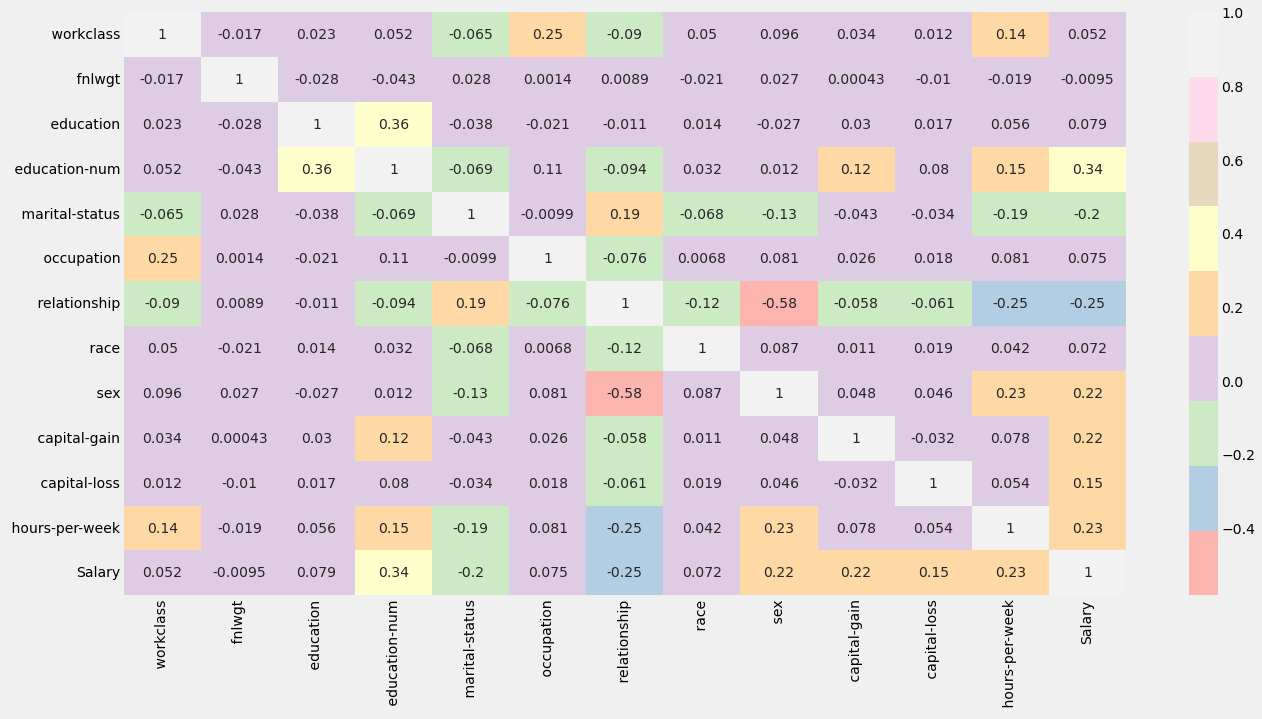

In [31]:
fig = plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot=True, cmap = 'Pastel1')

In [32]:
X=df.drop('Salary',axis=1)
y=df['Salary']

In [33]:
X

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,7,77516,9,13,4,1,1,4,1,2174,0,40
1,6,83311,9,13,2,4,0,4,1,0,0,13
2,4,215646,11,9,0,6,1,4,1,0,0,40
3,4,234721,1,7,2,6,0,2,1,0,0,40
4,4,338409,9,13,2,10,5,2,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,257302,7,12,2,13,5,4,0,0,0,38
32557,4,154374,11,9,2,7,0,4,1,0,0,40
32558,4,151910,11,9,6,1,4,4,0,0,0,40
32559,4,201490,11,9,4,1,3,4,1,0,0,20


In [34]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Salary, Length: 32536, dtype: int32

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


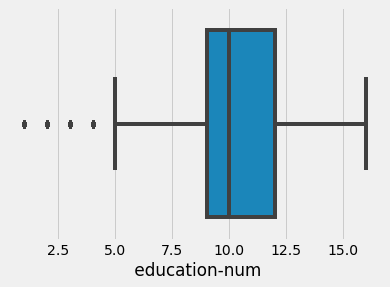

In [36]:
sns.boxplot(df[' education-num'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


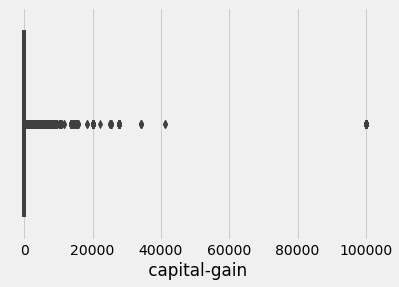

In [37]:
sns.boxplot(df[' capital-gain'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


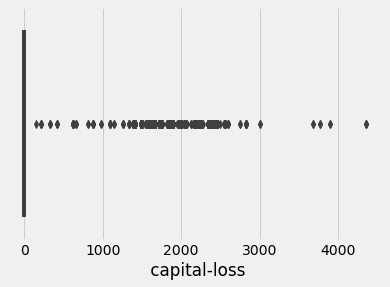

In [38]:
sns.boxplot(df[' capital-loss'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


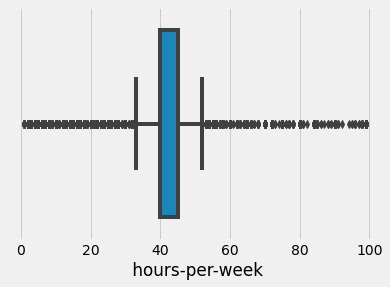

In [39]:
sns.boxplot(df[' hours-per-week'])
plt.show()

# DecisionTreeClassifier

#RFE on Decision Tree

In [40]:
model1=DecisionTreeClassifier()
rfe1 = RFE(model1, n_features_to_select = 8)
rfe1 = rfe1.fit(X_train, y_train)
rfe_table1 = pd.DataFrame(list(zip(X_train.columns, rfe1.support_, rfe1.ranking_)), columns = ['Features', 'Support', 'Rank'])
rfe_table1.sort_values(by = 'Rank', ascending = True)

,Features,Support,Rank
0,workclass,True,1
1,fnlwgt,True,1
3,education-num,True,1
5,occupation,True,1
6,relationship,True,1
9,capital-gain,True,1
10,capital-loss,True,1
11,hours-per-week,True,1
7,race,False,2
2,education,False,3


In [41]:
selected_col = X_train.columns[rfe1.support_]
selected_col

Index([' workclass', ' fnlwgt', ' education-num', ' occupation',
       ' relationship', ' capital-gain', ' capital-loss', ' hours-per-week'],
      dtype='object')

In [42]:
X_train_dt = X_train[selected_col]
X_test_dt = X_test[selected_col]
model1.fit(X_train_dt, y_train)
pred = model1.predict(X_test_dt)
print('Accuracy Score: ', accuracy_score(y_test, pred))

Accuracy Score:  0.8023112859601672


In [43]:
confusion_matrix = confusion_matrix(y_test, pred)
confusion_matrix

array([[5324,  816],
       [ 792, 1202]], dtype=int64)

# RandomForestClassifier

#RFE on RandomForest

In [55]:
model2 = RandomForestClassifier()
rfe2 = RFE(model2, n_features_to_select = 8)
rfe2 = rfe2.fit(X_train, y_train)
rfe_table1 = pd.DataFrame(list(zip(X_train.columns, rfe2.support_, rfe2.ranking_)), columns = ['Features', 'Support', 'Rank'])
rfe_table1.sort_values(by = 'Rank', ascending = True)

,Features,Support,Rank
0,workclass,True,1
1,fnlwgt,True,1
3,education-num,True,1
4,marital-status,True,1
5,occupation,True,1
6,relationship,True,1
9,capital-gain,True,1
11,hours-per-week,True,1
10,capital-loss,False,2
2,education,False,3


In [56]:
selected_col = X_train.columns[rfe2.support_]
selected_col

Index([' workclass', ' fnlwgt', ' education-num', ' marital-status',
       ' occupation', ' relationship', ' capital-gain', ' hours-per-week'],
      dtype='object')

In [57]:
X_train_rf = X_train[selected_col]
X_test_rf = X_test[selected_col]
model2.fit(X_train_rf, y_train)
pred = model2.predict(X_test_rf)
print('Accuracy Score: ', accuracy_score(y_test, pred))

Accuracy Score:  0.8345217605114335


# LogisticRegression

#RFE on LogisticRegression

In [62]:
model3=LogisticRegression()
rfe3 = RFE(model3, n_features_to_select = 8)
rfe3 = rfe3.fit(X_train, y_train)
rfe_table1 = pd.DataFrame(list(zip(X_train.columns, rfe3.support_, rfe3.ranking_)), columns = ['Features', 'Support', 'Rank'])
rfe_table1.sort_values(by = 'Rank', ascending = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,Features,Support,Rank
0,workclass,True,1
2,education,True,1
3,education-num,True,1
4,marital-status,True,1
6,relationship,True,1
7,race,True,1
8,sex,True,1
11,hours-per-week,True,1
10,capital-loss,False,2
5,occupation,False,3


In [63]:
selected_col = X_train.columns[rfe3.support_]
selected_col

Index([' workclass', ' education', ' education-num', ' marital-status',
       ' relationship', ' race', ' sex', ' hours-per-week'],
      dtype='object')

In [64]:
X_train_dt = X_train[selected_col]
X_test_dt = X_test[selected_col]
model3.fit(X_train_dt, y_train)
pred = model2.predict(X_test_dt)
print('Accuracy Score: ', accuracy_score(y_test, pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
-  education
-  race
-  sex
Feature names seen at fit time, yet now missing:
-  capital-gain
-  fnlwgt
-  occupation

  warnings.warn(message, FutureWarning)


Accuracy Score:  0.7555938037865749


# <hr>

# ** Hyper-parameter Optimization**

  * **GridSearch-CrossValidation**
  * **RandomizedSearch-CrossValidation**

# HyperParameter tuning on DecisionTree

In [44]:
DT_Params = {
    "criterion":['gini', 'entropy'],
    'max_depth':[2, 4, 6, 8],
    'min_samples_split':[2, 5, 10]
}

model = DecisionTreeClassifier()

In [46]:
# implementation of the GridSearch
DT_HP = GridSearchCV(model, DT_Params, cv = 5, verbose = 3)

# Fit the GridSearchCV on to my data
DT_HP.fit(X_train_dt, y_train)

# Getting the model best paramters
DT_Model_HP = DT_HP.best_estimator_

# printing the combination
print("Best paramter for DecisionTree are: ", DT_HP.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=0.828 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=0.829 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.828 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.829 total t

In [48]:
pred = DT_Model_HP.predict(X_test_dt)
print('Accuracy_score: ', accuracy_score(y_test, pred))

Accuracy_score:  0.8570199164002951


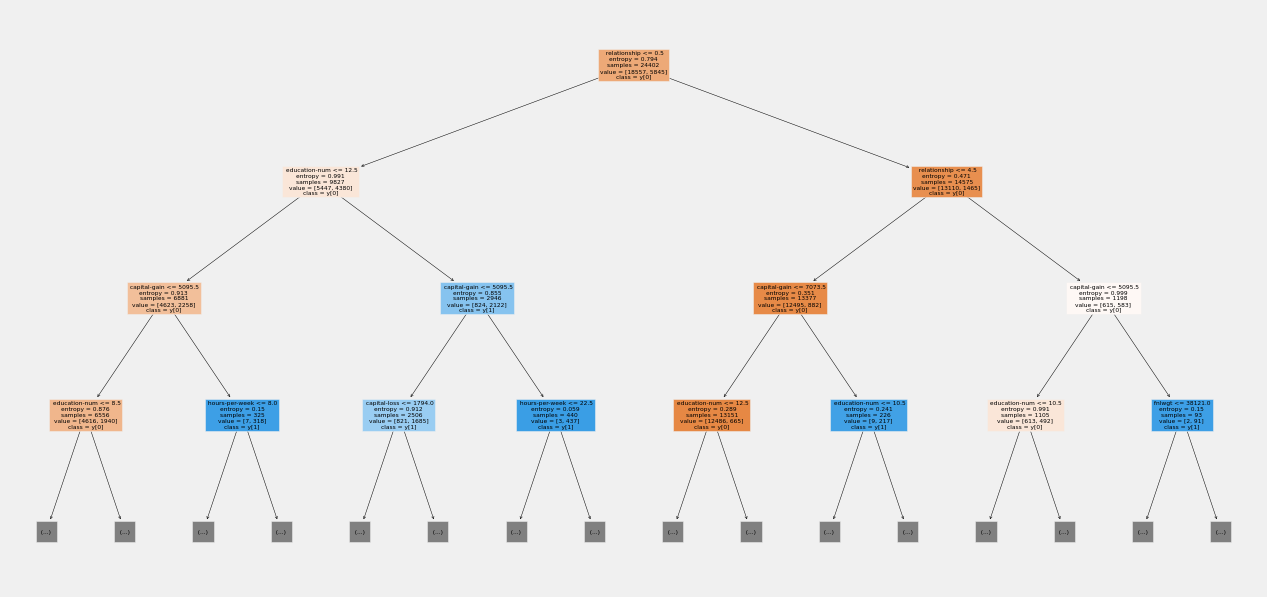

In [52]:
plt.figure(figsize=(20,10))
plot_tree(DT_Model_HP, feature_names=X_train_dt.columns, filled=True, max_depth = 3, class_names = True)
plt.show()

# HyperParameter tuning on Random Forest

In [58]:
RF_Params = {
    "criterion":['gini', 'entropy'],
    'n_estimators' : [10, 50, 100, 200],
    'max_depth':[3, 5, 7],
    'min_samples_split':[3, 7, 10]
}

model = RandomForestClassifier()

In [59]:
# implementation of the GridSearch
RF_HP = GridSearchCV(model, RF_Params, cv = 5, verbose = 3) # verbose = 3

# Fit the GridSearchCV on to my data
RF_HP.fit(X_train_rf, y_train)

# Getting the model best paramters
RF_Model_HP = RF_HP.best_estimator_

# printing the combination
print("Best paramter for RandomForest are: ", RF_HP.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=10;, score=0.799 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=10;, score=0.829 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=10;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=10;, score=0.832 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=10;, score=0.837 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=50;, score=0.830 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=50;, score=0.842 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=50;, score=0.820 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=3, 

In [60]:
pred = RF_Model_HP.predict(X_test_rf)
print('Accuracy_score: ', accuracy_score(y_test, pred))

Accuracy_score:  0.8501352348168183
